In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df=pd.read_csv('Bank_Data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['LoanAmount'].mean()

146.41216216216216

In [11]:
# fill the missing values for numerical terms - mean/mode
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [12]:
df['Gender'].mode()[0]


'Male'

In [13]:
# fill the missing values for categorical terms - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for x in cols:
    print(df[x].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [16]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
# replacing the value of 3+ to 4
df=df.replace(to_replace='3+',value='4')

In [18]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [19]:
#le=LabelEncoder()
#for col in cols:
    #df[col]=le.fit_transform(df[col])

In [20]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [21]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

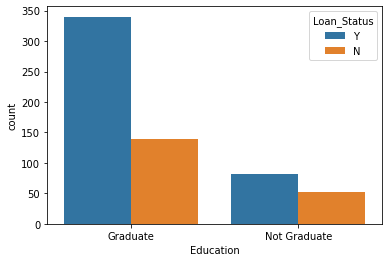

In [23]:
#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

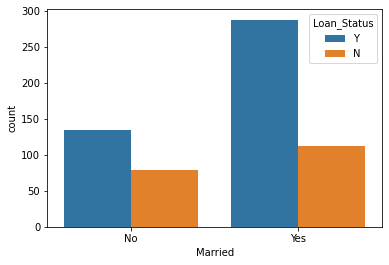

In [24]:
# marital status and loan_status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

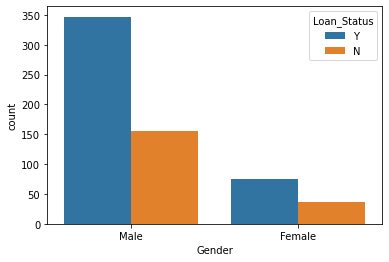

In [25]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

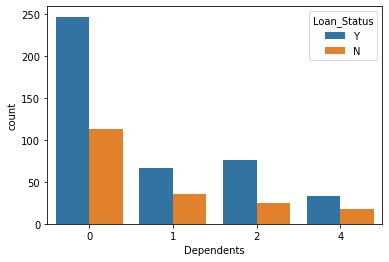

In [26]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

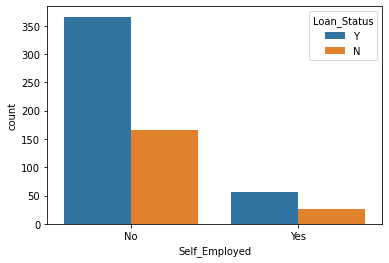

In [27]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

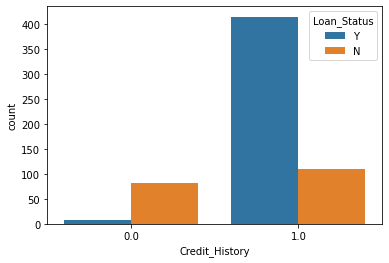

In [28]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

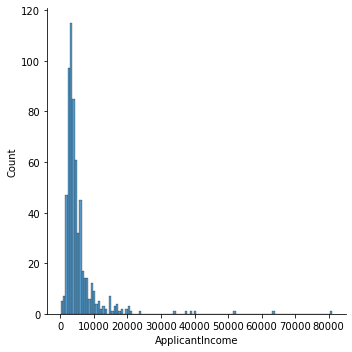

In [29]:
sns.displot(df['ApplicantIncome'])

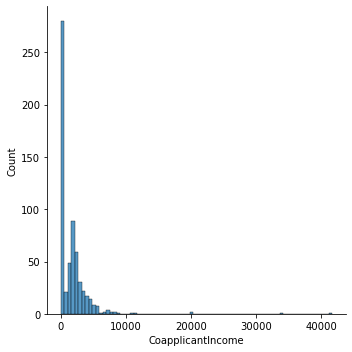

In [30]:
sns.displot(df['CoapplicantIncome'])

In [31]:
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [33]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df[['Loan_Status']]

In [34]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [35]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [37]:
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (491, 11) (123, 11)


## Training

In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

<ipython-input-38-f621451d02aa>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier()

## Accuracy score on Training Data

In [39]:
from sklearn.metrics import accuracy_score
yt_pred=model.predict(X_train)
accuracy_score(yt_pred,Y_train)#clearly overfitted

1.0

In [40]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
yt_pred=model2.predict(X_train)
accuracy_score(yt_pred,Y_train)#clearly overfitted

1.0

In [42]:
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()
model3.fit(X_train,Y_train)

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [43]:
yt_pred=model3.predict(X_train)
accuracy_score(yt_pred,Y_train)# not 0verfitted

0.7922606924643585

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier()
model4.fit(X_train,Y_train)
yt_pred=model4.predict(X_train)
accuracy_score(yt_pred,Y_train)# not 0verfitted

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8961303462321792

## test accuracy

## random forest

In [45]:
y_pred=model.predict(X_test)
accuracy_score(y_pred,Y_test)

0.8373983739837398

## decision tree

In [46]:
y_pred2=model2.predict(X_test)
accuracy_score(y_pred2,Y_test)

0.7073170731707317

## GaussianNB

In [47]:
y_pred3=model3.predict(X_test)
accuracy_score(y_pred3,Y_test)

0.8455284552845529

In [48]:
y_pred4=model4.predict(X_test)
accuracy_score(y_pred4,Y_test)

0.8211382113821138

In [49]:
level0 = list()
level0.append(('rf',RandomForestClassifier()))
level0.append(('det', DecisionTreeClassifier()))
level0.append(('gnb', GaussianNB()))
level0.append(('gbc',GradientBoostingClassifier()))

In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
stack_model = StackingClassifier(estimators=level0, final_estimator = LogisticRegression(), cv=10)

In [51]:
stack_model.fit(X_train,Y_train)


C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('det', DecisionTreeClassifier()),
                               ('gnb', GaussianNB()),
                               ('gbc', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

## testing accuracy

In [52]:
ys_pred=stack_model.predict(X_test)
accuracy_score(ys_pred,Y_test)

0.8373983739837398

## training accuracy

In [53]:
yst_pred=stack_model.predict(X_train)
accuracy_score(yst_pred,Y_train)

0.8839103869653768

## Implementing stacking Manually

In [54]:
model=RandomForestClassifier(n_estimators=5)
model2=DecisionTreeClassifier()
model3=GaussianNB()
model4=GradientBoostingClassifier()

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [56]:
Y_train.value_counts()

Loan_Status
1              316
0              144
dtype: int64

In [57]:
from sklearn.model_selection import StratifiedKFold
def Stacking(model,train,y,n_fold):
    folds=StratifiedKFold(n_splits=n_fold)
    train_pred=np.empty((0,1),int)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        print(x_train,x_val)
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        print(y_train,y_val)
        model.fit(x_train,y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        print(train_pred)

    return train_pred

In [58]:
train_pred_1=Stacking(model=model,n_fold=5, train=X_train,y=Y_train)
train_pred_2=Stacking(model=model2,n_fold=5, train=X_train,y=Y_train)
train_pred_3=Stacking(model=model3,n_fold=5,  train=X_train,y=Y_train)
train_pred_4=Stacking(model=model4,n_fold=5,  train=X_train,y=Y_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
40        1        0           0          0              0             3600   
72        1        0           0          0              0             3500   
230       1        1           1          0              0             2491   
348       1        1           0          0              0             6333   
438       1        0           0          0              1            10416   
..      ...      ...         ...        ...            ...              ...   
311       1        0           0          1              0             2927   
321       1        1           3          0              0             4342   
327       1        1           0          0              1             5818   
506       1        1           0          0              0            20833   
27        1        1           2          1              0             4226   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

<ipython-input-57-1e3361421f81>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-57-1e3361421f81>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-57-1e3361421f81>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-57-1e3361421f81>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-57-1e3361421f81>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0             4583   
394       1        1           2          0              0             3100   
316       1        1           2          0              0             3717   
62        1        1           0          1              1             2609   
158       1        0           0          0              0             2980   
..      ...      ...         ...        ...            ...              ...   
311       1        0           0          1              0             2927   
321       1        1           3          0              0             4342   
327       1        1           0          0              1             5818   
506       1        1           0          0              0            20833   
27        1        1           2          1              0             4226   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

     Loan_Status
1              0
394            1
316            1
62             0
158            1
..           ...
311            1
321            1
327            1
506            1
27             1

[368 rows x 1 columns]      Loan_Status
40             0
72             1
230            1
348            1
438            0
..           ...
445            1
199            0
461            1
141            1
391            1

[92 rows x 1 columns]
[1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1]
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0             4583   
394       1  

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0             4583   
394       1        1           2          0              0             3100   
316       1     

In [59]:
# convert into dataframe for later use
train_pred_1=pd.DataFrame(train_pred_1)
train_pred_2=pd.DataFrame(train_pred_2)
train_pred_3=pd.DataFrame(train_pred_3)
train_pred_4=pd.DataFrame(train_pred_4)

In [60]:
train_data_meta = pd.concat([train_pred_1, train_pred_2,train_pred_3,train_pred_4], axis=1)
#train_data_meta = pd.concat([train_pred_1,train_pred_3,train_pred_4], axis=1)
train_data_meta

,0,0,0,0
0,0,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,1,0,0
4,1,1,1,1
...,...,...,...,...
455,1,1,1,1
456,1,1,1,1
457,1,0,1,1
458,1,1,1,1


In [61]:

meta_model = LogisticRegression()

meta_model.fit(train_data_meta,Y_train)

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [62]:
model=RandomForestClassifier()
model2=DecisionTreeClassifier()
model3=GaussianNB()
model4=GradientBoostingClassifier()

In [63]:
model.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)
model4.fit(X_train,Y_train)

<ipython-input-63-dd2a3e172590>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [64]:
y1_pred=model.predict(X_test)
y2_pred=model2.predict(X_test)
y3_pred=model3.predict(X_test)
y4_pred=model4.predict(X_test)

In [65]:
y1_pred=pd.DataFrame(y1_pred)
y2_pred=pd.DataFrame(y2_pred)
y3_pred=pd.DataFrame(y3_pred)
y4_pred=pd.DataFrame(y4_pred)

In [66]:
test_res = pd.concat([y1_pred, y2_pred, y3_pred,y4_pred], axis=1)

In [67]:
test_res

,0,0,0,0
0,1,1,1,1
1,1,1,1,1
2,1,1,0,1
3,1,0,1,1
4,1,1,1,1
...,...,...,...,...
149,1,1,1,1
150,1,1,1,1
151,1,1,1,1
152,0,1,0,1


In [68]:
meta_model.score(test_res,Y_test)

0.8506493506493507

In [71]:
import pickle

In [72]:
pickle.dump(meta_model,open('StackModel.pkl','wb'))